In [1]:
# ensure that the imported .py file will get auto imported and updated whenever there is a change
%load_ext autoreload
%autoreload 2

# Num Of Epochs

First, we attempt to find the number of epochs that achieve the best training results.

In [5]:
import os, json
from BartSummarizer import train_model, load_json, test_model
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from transformers.trainer_utils import SchedulerType

# MODEL_NAME = 'allenai/led-large-16384-arxiv'
# MODEL_NAME = 'allenai/led-base-16384'
# MODEL_NAME = 'facebook/bart-large'
MODEL_NAME = 'facebook/bart-large-xsum'
# MODEL_NAME = 'facebook/bart-large-cnn'

In [20]:

all_metrics = []
def tweak_num_epochs(num_train_epochs):
  _, _, metrics = train_model(MODEL_NAME, num_train_epochs=num_train_epochs)
  print(f"Training results for Num Of Epochs {num_train_epochs}")
  print(metrics)
  all_metrics.append(metrics)

for i in range(1, 11):
  # Using default learning rate
  tweak_num_epochs(num_train_epochs=i)

print(all_metrics)

100%|██████████| 88/88 [00:18<00:00,  5.79it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 3.16508412361145, 'eval_runtime': 1.3172, 'eval_samples_per_second': 132.097, 'eval_steps_per_second': 16.702, 'epoch': 1.0}


100%|██████████| 88/88 [00:21<00:00,  4.02it/s]


{'train_runtime': 21.9162, 'train_samples_per_second': 31.803, 'train_steps_per_second': 4.015, 'train_loss': 5.176422119140625, 'epoch': 1.0}


100%|██████████| 22/22 [00:01<00:00, 16.41it/s]


{'eval_loss': 3.16508412361145, 'eval_runtime': 1.4104, 'eval_samples_per_second': 123.365, 'eval_steps_per_second': 15.598, 'epoch': 1.0}
Training results for Num Of Epochs 1
{'eval_loss': 3.16508412361145, 'eval_runtime': 1.4104, 'eval_samples_per_second': 123.365, 'eval_steps_per_second': 15.598, 'epoch': 1.0}


 50%|█████     | 88/176 [00:19<00:15,  5.87it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.8297150135040283, 'eval_runtime': 1.3147, 'eval_samples_per_second': 132.354, 'eval_steps_per_second': 16.734, 'epoch': 1.0}


100%|██████████| 176/176 [00:41<00:00,  5.04it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.086682915687561, 'eval_runtime': 1.2785, 'eval_samples_per_second': 136.096, 'eval_steps_per_second': 17.208, 'epoch': 2.0}


100%|██████████| 176/176 [00:44<00:00,  3.95it/s]


{'train_runtime': 44.524, 'train_samples_per_second': 31.309, 'train_steps_per_second': 3.953, 'train_loss': 3.006506486372514, 'epoch': 2.0}


100%|██████████| 22/22 [00:01<00:00, 16.20it/s]


{'eval_loss': 1.086682915687561, 'eval_runtime': 1.4392, 'eval_samples_per_second': 120.899, 'eval_steps_per_second': 15.286, 'epoch': 2.0}
Training results for Num Of Epochs 2
{'eval_loss': 1.086682915687561, 'eval_runtime': 1.4392, 'eval_samples_per_second': 120.899, 'eval_steps_per_second': 15.286, 'epoch': 2.0}


 33%|███▎      | 88/264 [00:18<00:30,  5.81it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.5024982690811157, 'eval_runtime': 1.3201, 'eval_samples_per_second': 131.809, 'eval_steps_per_second': 16.666, 'epoch': 1.0}


 67%|██████▋   | 176/264 [00:41<00:17,  4.97it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.029956340789795, 'eval_runtime': 1.2888, 'eval_samples_per_second': 135.014, 'eval_steps_per_second': 17.071, 'epoch': 2.0}


100%|██████████| 264/264 [01:03<00:00,  5.03it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.0024207830429077, 'eval_runtime': 1.2829, 'eval_samples_per_second': 135.635, 'eval_steps_per_second': 17.149, 'epoch': 3.0}


100%|██████████| 264/264 [01:06<00:00,  3.96it/s]


{'train_runtime': 66.7425, 'train_samples_per_second': 31.329, 'train_steps_per_second': 3.956, 'train_loss': 2.1543290109345405, 'epoch': 3.0}


100%|██████████| 22/22 [00:01<00:00, 16.49it/s]


{'eval_loss': 1.0024207830429077, 'eval_runtime': 1.404, 'eval_samples_per_second': 123.932, 'eval_steps_per_second': 15.67, 'epoch': 3.0}
Training results for Num Of Epochs 3
{'eval_loss': 1.0024207830429077, 'eval_runtime': 1.404, 'eval_samples_per_second': 123.932, 'eval_steps_per_second': 15.67, 'epoch': 3.0}


 25%|██▌       | 88/352 [00:18<00:44,  5.89it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.340977430343628, 'eval_runtime': 1.3052, 'eval_samples_per_second': 133.317, 'eval_steps_per_second': 16.856, 'epoch': 1.0}


 50%|█████     | 176/352 [00:40<00:34,  5.04it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.0467076301574707, 'eval_runtime': 1.2829, 'eval_samples_per_second': 135.626, 'eval_steps_per_second': 17.148, 'epoch': 2.0}


 75%|███████▌  | 264/352 [01:02<00:17,  5.02it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.0183203220367432, 'eval_runtime': 1.2826, 'eval_samples_per_second': 135.666, 'eval_steps_per_second': 17.153, 'epoch': 3.0}


100%|██████████| 352/352 [01:24<00:00,  5.02it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.0166796445846558, 'eval_runtime': 1.2785, 'eval_samples_per_second': 136.1, 'eval_steps_per_second': 17.208, 'epoch': 4.0}


100%|██████████| 352/352 [01:27<00:00,  4.02it/s]


{'train_runtime': 87.5099, 'train_samples_per_second': 31.859, 'train_steps_per_second': 4.022, 'train_loss': 1.7839000008322976, 'epoch': 4.0}


100%|██████████| 22/22 [00:01<00:00, 16.74it/s]


{'eval_loss': 1.0166796445846558, 'eval_runtime': 1.384, 'eval_samples_per_second': 125.719, 'eval_steps_per_second': 15.895, 'epoch': 4.0}
Training results for Num Of Epochs 4
{'eval_loss': 1.0166796445846558, 'eval_runtime': 1.384, 'eval_samples_per_second': 125.719, 'eval_steps_per_second': 15.895, 'epoch': 4.0}


 20%|██        | 88/440 [00:18<01:01,  5.75it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.2912414073944092, 'eval_runtime': 1.3022, 'eval_samples_per_second': 133.615, 'eval_steps_per_second': 16.894, 'epoch': 1.0}


 40%|████      | 176/440 [00:40<00:52,  5.00it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.0590075254440308, 'eval_runtime': 1.2853, 'eval_samples_per_second': 135.379, 'eval_steps_per_second': 17.117, 'epoch': 2.0}


 60%|██████    | 264/440 [01:03<00:35,  4.97it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.0307480096817017, 'eval_runtime': 1.2937, 'eval_samples_per_second': 134.494, 'eval_steps_per_second': 17.005, 'epoch': 3.0}


 80%|████████  | 352/440 [01:24<00:17,  5.06it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.0263102054595947, 'eval_runtime': 1.2821, 'eval_samples_per_second': 135.719, 'eval_steps_per_second': 17.16, 'epoch': 4.0}


100%|██████████| 440/440 [01:46<00:00,  5.06it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.0441032648086548, 'eval_runtime': 1.2847, 'eval_samples_per_second': 135.443, 'eval_steps_per_second': 17.125, 'epoch': 5.0}


100%|██████████| 440/440 [01:49<00:00,  4.01it/s]


{'train_runtime': 109.7714, 'train_samples_per_second': 31.748, 'train_steps_per_second': 4.008, 'train_loss': 1.569034784490412, 'epoch': 5.0}


100%|██████████| 22/22 [00:01<00:00, 16.33it/s]


{'eval_loss': 1.0441032648086548, 'eval_runtime': 1.4172, 'eval_samples_per_second': 122.779, 'eval_steps_per_second': 15.524, 'epoch': 5.0}
Training results for Num Of Epochs 5
{'eval_loss': 1.0441032648086548, 'eval_runtime': 1.4172, 'eval_samples_per_second': 122.779, 'eval_steps_per_second': 15.524, 'epoch': 5.0}


 17%|█▋        | 88/528 [00:18<01:19,  5.52it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.3221782445907593, 'eval_runtime': 1.3189, 'eval_samples_per_second': 131.928, 'eval_steps_per_second': 16.681, 'epoch': 1.0}


 33%|███▎      | 176/528 [00:40<01:09,  5.03it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.047270655632019, 'eval_runtime': 1.2879, 'eval_samples_per_second': 135.103, 'eval_steps_per_second': 17.082, 'epoch': 2.0}


 50%|█████     | 264/528 [01:02<00:52,  5.02it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.0311648845672607, 'eval_runtime': 1.2822, 'eval_samples_per_second': 135.703, 'eval_steps_per_second': 17.158, 'epoch': 3.0}


 67%|██████▋   | 352/528 [01:24<00:35,  5.01it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.0299016237258911, 'eval_runtime': 1.2997, 'eval_samples_per_second': 133.881, 'eval_steps_per_second': 16.928, 'epoch': 4.0}


 83%|████████▎ | 440/528 [01:46<00:17,  5.02it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.0514702796936035, 'eval_runtime': 1.2829, 'eval_samples_per_second': 135.63, 'eval_steps_per_second': 17.149, 'epoch': 5.0}


 95%|█████████▍| 501/528 [02:01<00:05,  5.02it/s]

{'loss': 1.5194, 'grad_norm': 1.7546899318695068, 'learning_rate': 2.651515151515152e-06, 'epoch': 5.68}


100%|██████████| 528/528 [02:08<00:00,  5.00it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.0628952980041504, 'eval_runtime': 1.2868, 'eval_samples_per_second': 135.216, 'eval_steps_per_second': 17.096, 'epoch': 6.0}


100%|██████████| 528/528 [02:11<00:00,  4.02it/s]


{'train_runtime': 131.4392, 'train_samples_per_second': 31.817, 'train_steps_per_second': 4.017, 'train_loss': 1.4700210708560366, 'epoch': 6.0}


100%|██████████| 22/22 [00:01<00:00, 17.04it/s]


{'eval_loss': 1.0628952980041504, 'eval_runtime': 1.3628, 'eval_samples_per_second': 127.68, 'eval_steps_per_second': 16.143, 'epoch': 6.0}
Training results for Num Of Epochs 6
{'eval_loss': 1.0628952980041504, 'eval_runtime': 1.3628, 'eval_samples_per_second': 127.68, 'eval_steps_per_second': 16.143, 'epoch': 6.0}


 14%|█▍        | 88/616 [00:18<01:39,  5.31it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.2744641304016113, 'eval_runtime': 1.3142, 'eval_samples_per_second': 132.403, 'eval_steps_per_second': 16.741, 'epoch': 1.0}


 29%|██▊       | 176/616 [00:40<01:27,  5.04it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.054577112197876, 'eval_runtime': 1.2866, 'eval_samples_per_second': 135.244, 'eval_steps_per_second': 17.1, 'epoch': 2.0}


 43%|████▎     | 264/616 [01:02<01:10,  5.00it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.0365893840789795, 'eval_runtime': 1.2937, 'eval_samples_per_second': 134.495, 'eval_steps_per_second': 17.005, 'epoch': 3.0}


 57%|█████▋    | 352/616 [01:24<00:52,  5.00it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.0422825813293457, 'eval_runtime': 1.2989, 'eval_samples_per_second': 133.961, 'eval_steps_per_second': 16.938, 'epoch': 4.0}


 71%|███████▏  | 440/616 [01:46<00:35,  4.98it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.069538950920105, 'eval_runtime': 1.2938, 'eval_samples_per_second': 134.491, 'eval_steps_per_second': 17.005, 'epoch': 5.0}


 81%|████████▏ | 501/616 [02:02<00:23,  4.97it/s]

{'loss': 1.4704, 'grad_norm': 1.8068394660949707, 'learning_rate': 9.415584415584416e-06, 'epoch': 5.68}


 86%|████████▌ | 528/616 [02:08<00:17,  5.01it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.093504548072815, 'eval_runtime': 1.2956, 'eval_samples_per_second': 134.299, 'eval_steps_per_second': 16.98, 'epoch': 6.0}


100%|██████████| 616/616 [02:30<00:00,  5.01it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.1005114316940308, 'eval_runtime': 1.2943, 'eval_samples_per_second': 134.435, 'eval_steps_per_second': 16.998, 'epoch': 7.0}


100%|██████████| 616/616 [02:33<00:00,  4.01it/s]


{'train_runtime': 153.6945, 'train_samples_per_second': 31.745, 'train_steps_per_second': 4.008, 'train_loss': 1.2910176623951306, 'epoch': 7.0}


100%|██████████| 22/22 [00:01<00:00, 16.81it/s]


{'eval_loss': 1.1005114316940308, 'eval_runtime': 1.3794, 'eval_samples_per_second': 126.142, 'eval_steps_per_second': 15.949, 'epoch': 7.0}
Training results for Num Of Epochs 7
{'eval_loss': 1.1005114316940308, 'eval_runtime': 1.3794, 'eval_samples_per_second': 126.142, 'eval_steps_per_second': 15.949, 'epoch': 7.0}


 12%|█▎        | 88/704 [00:19<02:00,  5.10it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.2449432611465454, 'eval_runtime': 1.3283, 'eval_samples_per_second': 130.995, 'eval_steps_per_second': 16.563, 'epoch': 1.0}


 25%|██▌       | 176/704 [00:40<01:45,  5.00it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.0630546808242798, 'eval_runtime': 1.2947, 'eval_samples_per_second': 134.398, 'eval_steps_per_second': 16.993, 'epoch': 2.0}


 38%|███▊      | 264/704 [01:02<01:28,  4.98it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.0491232872009277, 'eval_runtime': 1.298, 'eval_samples_per_second': 134.055, 'eval_steps_per_second': 16.949, 'epoch': 3.0}


 50%|█████     | 352/704 [01:24<01:10,  5.00it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.0618176460266113, 'eval_runtime': 1.2996, 'eval_samples_per_second': 133.882, 'eval_steps_per_second': 16.928, 'epoch': 4.0}


 62%|██████▎   | 440/704 [01:46<00:52,  5.00it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.083153486251831, 'eval_runtime': 1.2984, 'eval_samples_per_second': 134.01, 'eval_steps_per_second': 16.944, 'epoch': 5.0}


 71%|███████   | 501/704 [02:02<00:40,  4.99it/s]

{'loss': 1.4797, 'grad_norm': 1.7612028121948242, 'learning_rate': 1.4488636363636366e-05, 'epoch': 5.68}


 75%|███████▌  | 528/704 [02:08<00:35,  4.98it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.1039398908615112, 'eval_runtime': 1.2971, 'eval_samples_per_second': 134.149, 'eval_steps_per_second': 16.961, 'epoch': 6.0}


 88%|████████▊ | 616/704 [02:31<00:17,  4.95it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.1217098236083984, 'eval_runtime': 1.3089, 'eval_samples_per_second': 132.937, 'eval_steps_per_second': 16.808, 'epoch': 7.0}


100%|██████████| 704/704 [02:53<00:00,  5.05it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.1402466297149658, 'eval_runtime': 1.2811, 'eval_samples_per_second': 135.824, 'eval_steps_per_second': 17.173, 'epoch': 8.0}


100%|██████████| 704/704 [02:56<00:00,  4.00it/s]


{'train_runtime': 176.0835, 'train_samples_per_second': 31.667, 'train_steps_per_second': 3.998, 'train_loss': 1.193372748114846, 'epoch': 8.0}


100%|██████████| 22/22 [00:01<00:00, 16.30it/s]


{'eval_loss': 1.1402466297149658, 'eval_runtime': 1.4216, 'eval_samples_per_second': 122.399, 'eval_steps_per_second': 15.476, 'epoch': 8.0}
Training results for Num Of Epochs 8
{'eval_loss': 1.1402466297149658, 'eval_runtime': 1.4216, 'eval_samples_per_second': 122.399, 'eval_steps_per_second': 15.476, 'epoch': 8.0}


 11%|█         | 88/792 [00:18<01:59,  5.87it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.2673497200012207, 'eval_runtime': 1.308, 'eval_samples_per_second': 133.028, 'eval_steps_per_second': 16.82, 'epoch': 1.0}


 22%|██▏       | 176/792 [00:40<02:02,  5.05it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.069916844367981, 'eval_runtime': 1.279, 'eval_samples_per_second': 136.039, 'eval_steps_per_second': 17.2, 'epoch': 2.0}


 33%|███▎      | 264/792 [01:02<01:44,  5.07it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.0437568426132202, 'eval_runtime': 1.2815, 'eval_samples_per_second': 135.777, 'eval_steps_per_second': 17.167, 'epoch': 3.0}


 44%|████▍     | 352/792 [01:24<01:27,  5.04it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.0434296131134033, 'eval_runtime': 1.2768, 'eval_samples_per_second': 136.28, 'eval_steps_per_second': 17.231, 'epoch': 4.0}


 56%|█████▌    | 440/792 [01:46<01:10,  4.99it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.0857917070388794, 'eval_runtime': 1.2939, 'eval_samples_per_second': 134.481, 'eval_steps_per_second': 17.003, 'epoch': 5.0}


 63%|██████▎   | 501/792 [02:01<00:58,  4.97it/s]

{'loss': 1.4556, 'grad_norm': 1.7101519107818604, 'learning_rate': 1.8434343434343433e-05, 'epoch': 5.68}


 67%|██████▋   | 528/792 [02:08<00:53,  4.98it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.1173882484436035, 'eval_runtime': 1.2925, 'eval_samples_per_second': 134.624, 'eval_steps_per_second': 17.021, 'epoch': 6.0}


 78%|███████▊  | 616/792 [02:29<00:34,  5.06it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.1460435390472412, 'eval_runtime': 1.28, 'eval_samples_per_second': 135.942, 'eval_steps_per_second': 17.188, 'epoch': 7.0}


 89%|████████▉ | 704/792 [02:51<00:17,  4.96it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.1820591688156128, 'eval_runtime': 1.2881, 'eval_samples_per_second': 135.083, 'eval_steps_per_second': 17.079, 'epoch': 8.0}


100%|██████████| 792/792 [03:13<00:00,  5.05it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.1925865411758423, 'eval_runtime': 1.2844, 'eval_samples_per_second': 135.473, 'eval_steps_per_second': 17.129, 'epoch': 9.0}


100%|██████████| 792/792 [03:16<00:00,  4.02it/s]


{'train_runtime': 196.7876, 'train_samples_per_second': 31.877, 'train_steps_per_second': 4.025, 'train_loss': 1.0788176758120758, 'epoch': 9.0}


100%|██████████| 22/22 [00:01<00:00, 16.30it/s]


{'eval_loss': 1.1925865411758423, 'eval_runtime': 1.4219, 'eval_samples_per_second': 122.369, 'eval_steps_per_second': 15.472, 'epoch': 9.0}
Training results for Num Of Epochs 9
{'eval_loss': 1.1925865411758423, 'eval_runtime': 1.4219, 'eval_samples_per_second': 122.369, 'eval_steps_per_second': 15.472, 'epoch': 9.0}


 10%|█         | 88/880 [00:18<02:15,  5.87it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.2949165105819702, 'eval_runtime': 1.3091, 'eval_samples_per_second': 132.916, 'eval_steps_per_second': 16.806, 'epoch': 1.0}


 20%|██        | 176/880 [00:40<02:19,  5.06it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.08240807056427, 'eval_runtime': 1.2798, 'eval_samples_per_second': 135.958, 'eval_steps_per_second': 17.19, 'epoch': 2.0}


 30%|███       | 264/880 [01:02<02:02,  5.03it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.0501078367233276, 'eval_runtime': 1.2847, 'eval_samples_per_second': 135.441, 'eval_steps_per_second': 17.125, 'epoch': 3.0}


 40%|████      | 352/880 [01:24<01:44,  5.04it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.0431541204452515, 'eval_runtime': 1.2891, 'eval_samples_per_second': 134.978, 'eval_steps_per_second': 17.066, 'epoch': 4.0}


 50%|█████     | 440/880 [01:46<01:27,  5.00it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.0991718769073486, 'eval_runtime': 1.2802, 'eval_samples_per_second': 135.912, 'eval_steps_per_second': 17.184, 'epoch': 5.0}


 57%|█████▋    | 501/880 [02:01<01:15,  4.99it/s]

{'loss': 1.5592, 'grad_norm': 2.1307668685913086, 'learning_rate': 2.1590909090909093e-05, 'epoch': 5.68}


 60%|██████    | 528/880 [02:08<01:11,  4.90it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.1098994016647339, 'eval_runtime': 1.2899, 'eval_samples_per_second': 134.893, 'eval_steps_per_second': 17.055, 'epoch': 6.0}


 70%|███████   | 616/880 [02:30<00:52,  5.06it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.1536558866500854, 'eval_runtime': 1.2903, 'eval_samples_per_second': 134.849, 'eval_steps_per_second': 17.05, 'epoch': 7.0}


 80%|████████  | 704/880 [02:52<00:34,  5.04it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.1932564973831177, 'eval_runtime': 1.2844, 'eval_samples_per_second': 135.473, 'eval_steps_per_second': 17.129, 'epoch': 8.0}


 90%|█████████ | 792/880 [03:13<00:17,  5.04it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.2028428316116333, 'eval_runtime': 1.2963, 'eval_samples_per_second': 134.229, 'eval_steps_per_second': 16.971, 'epoch': 9.0}


100%|██████████| 880/880 [03:35<00:00,  5.03it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.235280156135559, 'eval_runtime': 1.2839, 'eval_samples_per_second': 135.526, 'eval_steps_per_second': 17.135, 'epoch': 10.0}


100%|██████████| 880/880 [03:38<00:00,  4.03it/s]


{'train_runtime': 218.5954, 'train_samples_per_second': 31.885, 'train_steps_per_second': 4.026, 'train_loss': 1.0656627481633967, 'epoch': 10.0}


100%|██████████| 22/22 [00:01<00:00, 17.04it/s]

{'eval_loss': 1.235280156135559, 'eval_runtime': 1.3634, 'eval_samples_per_second': 127.62, 'eval_steps_per_second': 16.136, 'epoch': 10.0}
Training results for Num Of Epochs 10
{'eval_loss': 1.235280156135559, 'eval_runtime': 1.3634, 'eval_samples_per_second': 127.62, 'eval_steps_per_second': 16.136, 'epoch': 10.0}
[{'eval_loss': 3.16508412361145, 'eval_runtime': 1.4104, 'eval_samples_per_second': 123.365, 'eval_steps_per_second': 15.598, 'epoch': 1.0}, {'eval_loss': 1.086682915687561, 'eval_runtime': 1.4392, 'eval_samples_per_second': 120.899, 'eval_steps_per_second': 15.286, 'epoch': 2.0}, {'eval_loss': 1.0024207830429077, 'eval_runtime': 1.404, 'eval_samples_per_second': 123.932, 'eval_steps_per_second': 15.67, 'epoch': 3.0}, {'eval_loss': 1.0166796445846558, 'eval_runtime': 1.384, 'eval_samples_per_second': 125.719, 'eval_steps_per_second': 15.895, 'epoch': 4.0}, {'eval_loss': 1.0441032648086548, 'eval_runtime': 1.4172, 'eval_samples_per_second': 122.779, 'eval_steps_per_second': 

[3.16508412361145, 1.086682915687561, 1.0024207830429077, 1.0166796445846558, 1.0441032648086548, 1.0628952980041504, 1.1005114316940308, 1.1402466297149658, 1.1925865411758423, 1.235280156135559]


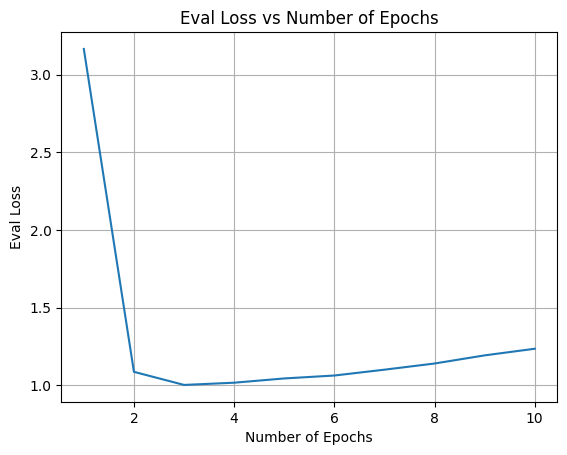

In [23]:
# metrics from previous trainings
metrics = [{'eval_loss': 3.16508412361145, 'eval_runtime': 1.4104, 'eval_samples_per_second': 123.365, 'eval_steps_per_second': 15.598, 'epoch': 1.0}, {'eval_loss': 1.086682915687561, 'eval_runtime': 1.4392, 'eval_samples_per_second': 120.899, 'eval_steps_per_second': 15.286, 'epoch': 2.0}, {'eval_loss': 1.0024207830429077, 'eval_runtime': 1.404, 'eval_samples_per_second': 123.932, 'eval_steps_per_second': 15.67, 'epoch': 3.0}, {'eval_loss': 1.0166796445846558, 'eval_runtime': 1.384, 'eval_samples_per_second': 125.719, 'eval_steps_per_second': 15.895, 'epoch': 4.0}, {'eval_loss': 1.0441032648086548, 'eval_runtime': 1.4172, 'eval_samples_per_second': 122.779, 'eval_steps_per_second': 15.524, 'epoch': 5.0}, {'eval_loss': 1.0628952980041504, 'eval_runtime': 1.3628, 'eval_samples_per_second': 127.68, 'eval_steps_per_second': 16.143, 'epoch': 6.0}, {'eval_loss': 1.1005114316940308, 'eval_runtime': 1.3794, 'eval_samples_per_second': 126.142, 'eval_steps_per_second': 15.949, 'epoch': 7.0}, {'eval_loss': 1.1402466297149658, 'eval_runtime': 1.4216, 'eval_samples_per_second': 122.399, 'eval_steps_per_second': 15.476, 'epoch': 8.0}, {'eval_loss': 1.1925865411758423, 'eval_runtime': 1.4219, 'eval_samples_per_second': 122.369, 'eval_steps_per_second': 15.472, 'epoch': 9.0}, {'eval_loss': 1.235280156135559, 'eval_runtime': 1.3634, 'eval_samples_per_second': 127.62, 'eval_steps_per_second': 16.136, 'epoch': 10.0}]

epochs = range(1, 11)
data = [metric['eval_loss'] for metric in metrics]
print(data)
plt.plot(epochs, data)

plt.xlabel('Number of Epochs')
plt.ylabel('Eval Loss')
plt.title('Eval Loss vs Number of Epochs')
plt.grid(True)
plt.show()

# Learning Rate

Next we fix the other hyperparameters and tweak the learning rate

In [6]:
model, tokenizer, metrics = None, None, []
def tweak_learning_rate(learning_rates):
  results = []
  for learning_rate in learning_rates:
    model, tokenizer, metrics = train_model(MODEL_NAME, learning_rate=learning_rate)
    print(f"Training results for Learning Rate: {learning_rate}")
    print(metrics)
    results.append((model, tokenizer, metrics))
  return results

learning_rates = [
  5e-10,
  5e-9,
  5e-8,
  5e-7,
  5e-6,
  5e-5, 
  5e-4, 
  5e-3, 
  5e-2, 
]

results = tweak_learning_rate(learning_rates)
print(results)


 33%|███▎      | 88/264 [00:24<00:39,  4.45it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}


{'eval_loss': 1.8328534364700317, 'eval_runtime': 1.7781, 'eval_samples_per_second': 97.857, 'eval_steps_per_second': 12.373, 'epoch': 1.0}


 67%|██████▋   | 176/264 [00:53<00:19,  4.54it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}


{'eval_loss': 1.2924892902374268, 'eval_runtime': 1.8893, 'eval_samples_per_second': 92.096, 'eval_steps_per_second': 11.644, 'epoch': 2.0}


100%|██████████| 264/264 [01:21<00:00,  4.53it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}


{'eval_loss': 1.2324775457382202, 'eval_runtime': 1.7831, 'eval_samples_per_second': 97.581, 'eval_steps_per_second': 12.338, 'epoch': 3.0}


100%|██████████| 264/264 [01:25<00:00,  3.10it/s]


{'train_runtime': 85.243, 'train_samples_per_second': 24.53, 'train_steps_per_second': 3.097, 'train_loss': 2.4219598481149385, 'epoch': 3.0}


100%|██████████| 22/22 [00:02<00:00,  9.28it/s]

{'eval_loss': 1.2324775457382202, 'eval_runtime': 2.4738, 'eval_samples_per_second': 70.336, 'eval_steps_per_second': 8.893, 'epoch': 3.0}
Training results for Learning Rate: 5e-06
{'eval_loss': 1.2324775457382202, 'eval_runtime': 2.4738, 'eval_samples_per_second': 70.336, 'eval_steps_per_second': 8.893, 'epoch': 3.0}
[(BartForConditionalGeneration(
  (model): BartModel(
    (shared): Embedding(50264, 1024, padding_idx=1)
    (encoder): BartEncoder(
      (embed_tokens): Embedding(50264, 1024, padding_idx=1)
      (embed_positions): BartLearnedPositionalEmbedding(1026, 1024)
      (layers): ModuleList(
        (0-11): 12 x BartEncoderLayer(
          (self_attn): BartSdpaAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)

[7.9033589363098145, 7.877323627471924, 7.6204304695129395, 9.65340518951416, 5.103395462036133, 1.0034829378128052, 6.006220817565918, 4.173675060272217, 6.677041530609131]


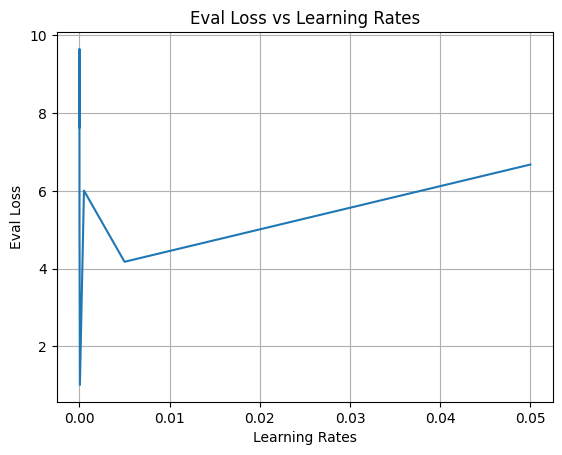

In [7]:
# Recorded results from previous trainings
learning_rate_metrics = [
  {'eval_loss': 7.9033589363098145, 'eval_runtime': 2.2266, 'eval_samples_per_second': 78.147, 'eval_steps_per_second': 9.881, 'epoch': 3.0},
  {'eval_loss': 7.877323627471924, 'eval_runtime': 2.2325, 'eval_samples_per_second': 77.938, 'eval_steps_per_second': 9.854, 'epoch': 3.0},
  {'eval_loss': 7.6204304695129395, 'eval_runtime': 2.0795, 'eval_samples_per_second': 83.675, 'eval_steps_per_second': 10.58, 'epoch': 3.0},
  {'eval_loss': 9.65340518951416, 'eval_runtime': 2.5363, 'eval_samples_per_second': 68.603, 'eval_steps_per_second': 8.674, 'epoch': 3.0},
  {'eval_loss': 5.103395462036133, 'eval_runtime': 1.9718, 'eval_samples_per_second': 88.243, 'eval_steps_per_second': 11.157, 'epoch': 3.0},
  {'eval_loss': 1.0034829378128052, 'eval_runtime': 1.3766, 'eval_samples_per_second': 126.403, 'eval_steps_per_second': 15.982, 'epoch': 3.0},
  {'eval_loss': 6.006220817565918, 'eval_runtime': 1.4036, 'eval_samples_per_second': 123.964, 'eval_steps_per_second': 15.674, 'epoch': 3.0},
  {'eval_loss': 4.173675060272217, 'eval_runtime': 1.4065, 'eval_samples_per_second': 123.712, 'eval_steps_per_second': 15.642, 'epoch': 3.0},
  {'eval_loss': 6.677041530609131, 'eval_runtime': 1.3979, 'eval_samples_per_second': 124.474, 'eval_steps_per_second': 15.738, 'epoch': 3.0},
]

data = [
  metric['eval_loss']
  for metric in learning_rate_metrics
]

print(data)

learning_rates = [
  5e-10,
  5e-9,
  5e-8,
  5e-7,
  5e-6,
  5e-5, 
  5e-4, 
  5e-3, 
  5e-2, 
]
plt.plot(learning_rates, data)

plt.xlabel('Learning Rates')
plt.ylabel('Eval Loss')
plt.title('Eval Loss vs Learning Rates')
plt.grid(True)
plt.show()

# LR Scheduler Type

In [4]:

def tweak_lr_scheduler_type(lr_scheduler_types):
  results = []
  for lr_scheduler_type in lr_scheduler_types:
    print(f'Training {lr_scheduler_type}')
    model, tokenizer, metrics = train_model(MODEL_NAME, lr_scheduler_type=lr_scheduler_type)
    results.append((lr_scheduler_type, model, tokenizer, metrics))
    print(f'Training results for {lr_scheduler_type}')
    print(metrics)
  return results

types = [
  SchedulerType.LINEAR,
  SchedulerType.COSINE,
  SchedulerType.COSINE_WITH_RESTARTS,
  SchedulerType.POLYNOMIAL,
  SchedulerType.CONSTANT,
  SchedulerType.CONSTANT_WITH_WARMUP,
  SchedulerType.INVERSE_SQRT,
  SchedulerType.REDUCE_ON_PLATEAU,
]
print(types)
lr_scheduler_results = tweak_lr_scheduler_type(types)
print(lr_scheduler_results)


[<SchedulerType.LINEAR: 'linear'>, <SchedulerType.COSINE: 'cosine'>, <SchedulerType.COSINE_WITH_RESTARTS: 'cosine_with_restarts'>, <SchedulerType.POLYNOMIAL: 'polynomial'>, <SchedulerType.CONSTANT: 'constant'>, <SchedulerType.CONSTANT_WITH_WARMUP: 'constant_with_warmup'>, <SchedulerType.INVERSE_SQRT: 'inverse_sqrt'>, <SchedulerType.REDUCE_ON_PLATEAU: 'reduce_lr_on_plateau'>]
Training SchedulerType.LINEAR


  0%|          | 0/264 [00:00<?, ?it/s]d:\miniconda3\envs\main\Lib\site-packages\transformers\models\bart\modeling_bart.py:587: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(
                                                
 33%|███▎      | 88/264 [00:26<00:41,  4.23it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}


{'eval_loss': 1.6791504621505737, 'eval_runtime': 1.8773, 'eval_samples_per_second': 92.685, 'eval_steps_per_second': 11.719, 'epoch': 1.0}


                                                 
 67%|██████▋   | 176/264 [00:57<00:20,  4.26it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}


{'eval_loss': 1.609755039215088, 'eval_runtime': 1.8769, 'eval_samples_per_second': 92.707, 'eval_steps_per_second': 11.722, 'epoch': 2.0}


                                                 
100%|██████████| 264/264 [01:27<00:00,  4.30it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}


{'eval_loss': 1.6933766603469849, 'eval_runtime': 1.8733, 'eval_samples_per_second': 92.884, 'eval_steps_per_second': 11.744, 'epoch': 3.0}


100%|██████████| 264/264 [01:30<00:00,  2.90it/s]


{'train_runtime': 90.9387, 'train_samples_per_second': 22.994, 'train_steps_per_second': 2.903, 'train_loss': 1.0746476144501658, 'epoch': 3.0}


100%|██████████| 22/22 [00:02<00:00,  9.14it/s]


{'eval_loss': 1.6933766603469849, 'eval_runtime': 2.5436, 'eval_samples_per_second': 68.406, 'eval_steps_per_second': 8.649, 'epoch': 3.0}
Training results for SchedulerType.LINEAR
{'eval_loss': 1.6933766603469849, 'eval_runtime': 2.5436, 'eval_samples_per_second': 68.406, 'eval_steps_per_second': 8.649, 'epoch': 3.0}
Training SchedulerType.COSINE


Map: 100%|██████████| 174/174 [00:00<00:00, 222.22 examples/s]
                                                
 33%|███▎      | 88/264 [00:27<00:45,  3.91it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}


{'eval_loss': 1.080041766166687, 'eval_runtime': 2.099, 'eval_samples_per_second': 82.896, 'eval_steps_per_second': 10.481, 'epoch': 1.0}


                                                 
 67%|██████▋   | 176/264 [00:58<00:20,  4.36it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}


{'eval_loss': 1.05549156665802, 'eval_runtime': 1.8653, 'eval_samples_per_second': 93.285, 'eval_steps_per_second': 11.795, 'epoch': 2.0}


                                                 
100%|██████████| 264/264 [01:28<00:00,  4.36it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}


{'eval_loss': 1.1853681802749634, 'eval_runtime': 1.8809, 'eval_samples_per_second': 92.51, 'eval_steps_per_second': 11.697, 'epoch': 3.0}


100%|██████████| 264/264 [01:31<00:00,  2.89it/s]


{'train_runtime': 91.3957, 'train_samples_per_second': 22.879, 'train_steps_per_second': 2.889, 'train_loss': 1.1139220035437383, 'epoch': 3.0}


100%|██████████| 22/22 [00:02<00:00, 10.63it/s]


{'eval_loss': 1.1853681802749634, 'eval_runtime': 2.2612, 'eval_samples_per_second': 76.951, 'eval_steps_per_second': 9.729, 'epoch': 3.0}
Training results for SchedulerType.COSINE
{'eval_loss': 1.1853681802749634, 'eval_runtime': 2.2612, 'eval_samples_per_second': 76.951, 'eval_steps_per_second': 9.729, 'epoch': 3.0}
Training SchedulerType.COSINE_WITH_RESTARTS


Map: 100%|██████████| 174/174 [00:00<00:00, 222.78 examples/s]
                                                
 33%|███▎      | 88/264 [00:27<00:47,  3.71it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}


{'eval_loss': 1.0693637132644653, 'eval_runtime': 2.1976, 'eval_samples_per_second': 79.176, 'eval_steps_per_second': 10.011, 'epoch': 1.0}


                                                 
 67%|██████▋   | 176/264 [00:57<00:20,  4.27it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}


{'eval_loss': 1.0170060396194458, 'eval_runtime': 1.8863, 'eval_samples_per_second': 92.243, 'eval_steps_per_second': 11.663, 'epoch': 2.0}


                                                 
100%|██████████| 264/264 [01:28<00:00,  4.28it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}


{'eval_loss': 1.037064790725708, 'eval_runtime': 1.8818, 'eval_samples_per_second': 92.462, 'eval_steps_per_second': 11.691, 'epoch': 3.0}


100%|██████████| 264/264 [01:31<00:00,  2.89it/s]


{'train_runtime': 91.3334, 'train_samples_per_second': 22.894, 'train_steps_per_second': 2.891, 'train_loss': 1.1257968093409683, 'epoch': 3.0}


100%|██████████| 22/22 [00:02<00:00, 10.52it/s]


{'eval_loss': 1.037064790725708, 'eval_runtime': 2.2759, 'eval_samples_per_second': 76.452, 'eval_steps_per_second': 9.666, 'epoch': 3.0}
Training results for SchedulerType.COSINE_WITH_RESTARTS
{'eval_loss': 1.037064790725708, 'eval_runtime': 2.2759, 'eval_samples_per_second': 76.452, 'eval_steps_per_second': 9.666, 'epoch': 3.0}
Training SchedulerType.POLYNOMIAL


 33%|███▎      | 88/264 [00:27<00:42,  4.19it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}


{'eval_loss': 1.0759943723678589, 'eval_runtime': 1.9834, 'eval_samples_per_second': 87.726, 'eval_steps_per_second': 11.092, 'epoch': 1.0}


 67%|██████▋   | 176/264 [00:57<00:20,  4.22it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}


{'eval_loss': 1.0372523069381714, 'eval_runtime': 1.9336, 'eval_samples_per_second': 89.989, 'eval_steps_per_second': 11.378, 'epoch': 2.0}


100%|██████████| 264/264 [01:28<00:00,  4.32it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}


{'eval_loss': 1.254083514213562, 'eval_runtime': 1.8971, 'eval_samples_per_second': 91.721, 'eval_steps_per_second': 11.597, 'epoch': 3.0}


100%|██████████| 264/264 [01:31<00:00,  2.89it/s]


{'train_runtime': 91.452, 'train_samples_per_second': 22.864, 'train_steps_per_second': 2.887, 'train_loss': 1.1010285579796992, 'epoch': 3.0}


100%|██████████| 22/22 [00:02<00:00, 10.46it/s]


{'eval_loss': 1.254083514213562, 'eval_runtime': 2.2602, 'eval_samples_per_second': 76.983, 'eval_steps_per_second': 9.733, 'epoch': 3.0}
Training results for SchedulerType.POLYNOMIAL
{'eval_loss': 1.254083514213562, 'eval_runtime': 2.2602, 'eval_samples_per_second': 76.983, 'eval_steps_per_second': 9.733, 'epoch': 3.0}
Training SchedulerType.CONSTANT


 33%|███▎      | 88/264 [00:27<00:42,  4.15it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}


{'eval_loss': 1.0706448554992676, 'eval_runtime': 1.997, 'eval_samples_per_second': 87.13, 'eval_steps_per_second': 11.016, 'epoch': 1.0}


 67%|██████▋   | 176/264 [00:58<00:20,  4.24it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}


{'eval_loss': 1.0478824377059937, 'eval_runtime': 1.8987, 'eval_samples_per_second': 91.643, 'eval_steps_per_second': 11.587, 'epoch': 2.0}


100%|██████████| 264/264 [01:29<00:00,  4.24it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}


{'eval_loss': 1.1042007207870483, 'eval_runtime': 1.9866, 'eval_samples_per_second': 87.586, 'eval_steps_per_second': 11.074, 'epoch': 3.0}


100%|██████████| 264/264 [01:32<00:00,  2.86it/s]


{'train_runtime': 92.3956, 'train_samples_per_second': 22.631, 'train_steps_per_second': 2.857, 'train_loss': 1.07401298754143, 'epoch': 3.0}


100%|██████████| 22/22 [00:01<00:00, 11.53it/s]


{'eval_loss': 1.1042007207870483, 'eval_runtime': 2.0875, 'eval_samples_per_second': 83.352, 'eval_steps_per_second': 10.539, 'epoch': 3.0}
Training results for SchedulerType.CONSTANT
{'eval_loss': 1.1042007207870483, 'eval_runtime': 2.0875, 'eval_samples_per_second': 83.352, 'eval_steps_per_second': 10.539, 'epoch': 3.0}
Training SchedulerType.CONSTANT_WITH_WARMUP


 33%|███▎      | 88/264 [00:27<00:44,  3.94it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}


{'eval_loss': 1.0776599645614624, 'eval_runtime': 1.9971, 'eval_samples_per_second': 87.128, 'eval_steps_per_second': 11.016, 'epoch': 1.0}


 67%|██████▋   | 176/264 [00:58<00:20,  4.26it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}


{'eval_loss': 1.0514321327209473, 'eval_runtime': 1.9764, 'eval_samples_per_second': 88.039, 'eval_steps_per_second': 11.131, 'epoch': 2.0}


100%|██████████| 264/264 [01:29<00:00,  4.18it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}


{'eval_loss': 1.0946723222732544, 'eval_runtime': 1.9111, 'eval_samples_per_second': 91.047, 'eval_steps_per_second': 11.512, 'epoch': 3.0}


100%|██████████| 264/264 [01:32<00:00,  2.86it/s]


{'train_runtime': 92.2817, 'train_samples_per_second': 22.659, 'train_steps_per_second': 2.861, 'train_loss': 1.0433586582993015, 'epoch': 3.0}


100%|██████████| 22/22 [00:02<00:00,  9.00it/s]


{'eval_loss': 1.0946723222732544, 'eval_runtime': 2.6069, 'eval_samples_per_second': 66.746, 'eval_steps_per_second': 8.439, 'epoch': 3.0}
Training results for SchedulerType.CONSTANT_WITH_WARMUP
{'eval_loss': 1.0946723222732544, 'eval_runtime': 2.6069, 'eval_samples_per_second': 66.746, 'eval_steps_per_second': 8.439, 'epoch': 3.0}
Training SchedulerType.INVERSE_SQRT


 33%|███▎      | 88/264 [04:03<01:27,  2.00it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}


{'eval_loss': 1.0790880918502808, 'eval_runtime': 4.6605, 'eval_samples_per_second': 37.335, 'eval_steps_per_second': 4.72, 'epoch': 1.0}


 67%|██████▋   | 176/264 [05:03<00:42,  2.09it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}


{'eval_loss': 1.0587712526321411, 'eval_runtime': 4.8436, 'eval_samples_per_second': 35.924, 'eval_steps_per_second': 4.542, 'epoch': 2.0}


100%|██████████| 264/264 [06:05<00:00,  2.05it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}


{'eval_loss': 1.0939048528671265, 'eval_runtime': 4.9256, 'eval_samples_per_second': 35.326, 'eval_steps_per_second': 4.467, 'epoch': 3.0}


100%|██████████| 264/264 [06:08<00:00,  1.39s/it]


{'train_runtime': 368.2687, 'train_samples_per_second': 5.678, 'train_steps_per_second': 0.717, 'train_loss': 1.04185659235174, 'epoch': 3.0}


100%|██████████| 22/22 [00:04<00:00,  4.66it/s]


{'eval_loss': 1.0939048528671265, 'eval_runtime': 4.9752, 'eval_samples_per_second': 34.973, 'eval_steps_per_second': 4.422, 'epoch': 3.0}
Training results for SchedulerType.INVERSE_SQRT
{'eval_loss': 1.0939048528671265, 'eval_runtime': 4.9752, 'eval_samples_per_second': 34.973, 'eval_steps_per_second': 4.422, 'epoch': 3.0}
Training SchedulerType.REDUCE_ON_PLATEAU


 33%|███▎      | 88/264 [07:06<01:12,  2.42it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}


{'eval_loss': 1.0803794860839844, 'eval_runtime': 65.0747, 'eval_samples_per_second': 2.674, 'eval_steps_per_second': 0.338, 'epoch': 1.0}


 67%|██████▋   | 176/264 [08:23<00:17,  5.04it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}


{'eval_loss': 1.0444999933242798, 'eval_runtime': 1.607, 'eval_samples_per_second': 108.276, 'eval_steps_per_second': 13.69, 'epoch': 2.0}


100%|██████████| 264/264 [08:52<00:00,  4.59it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}


{'eval_loss': 1.100622296333313, 'eval_runtime': 1.8244, 'eval_samples_per_second': 95.374, 'eval_steps_per_second': 12.059, 'epoch': 3.0}


100%|██████████| 264/264 [08:55<00:00,  2.03s/it]


{'train_runtime': 535.649, 'train_samples_per_second': 3.904, 'train_steps_per_second': 0.493, 'train_loss': 1.0262564456824101, 'epoch': 3.0}


100%|██████████| 22/22 [00:02<00:00, 10.56it/s]

{'eval_loss': 1.100622296333313, 'eval_runtime': 2.2553, 'eval_samples_per_second': 77.151, 'eval_steps_per_second': 9.755, 'epoch': 3.0}
Training results for SchedulerType.REDUCE_ON_PLATEAU
{'eval_loss': 1.100622296333313, 'eval_runtime': 2.2553, 'eval_samples_per_second': 77.151, 'eval_steps_per_second': 9.755, 'epoch': 3.0}


NameError: name 'results' is not defined

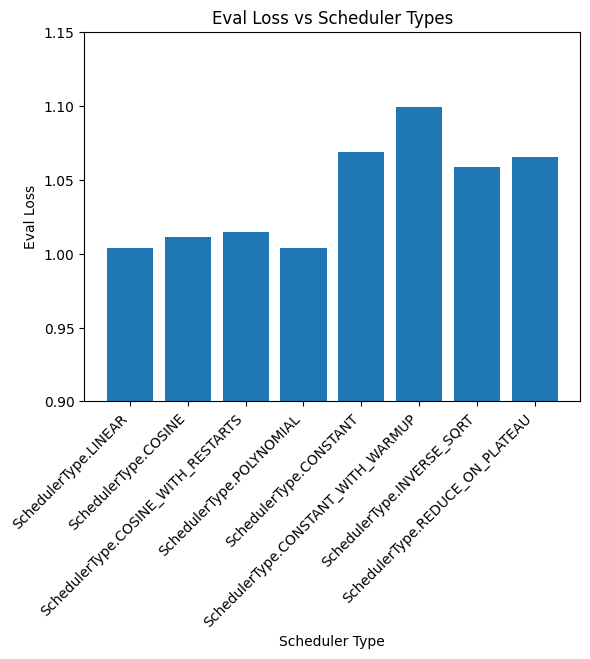

In [8]:
metrics = [
  (
    SchedulerType.LINEAR,
    {'eval_loss': 1.6933766603469849, 'eval_runtime': 2.5436, 'eval_samples_per_second': 68.406, 'eval_steps_per_second': 8.649, 'epoch': 3.0},
  ),
  (
    SchedulerType.COSINE,
    {'eval_loss': 1.1853681802749634, 'eval_runtime': 2.2612, 'eval_samples_per_second': 76.951, 'eval_steps_per_second': 9.729, 'epoch': 3.0},
  ),
  (
    SchedulerType.COSINE_WITH_RESTARTS,
    {'eval_loss': 1.037064790725708, 'eval_runtime': 2.2759, 'eval_samples_per_second': 76.452, 'eval_steps_per_second': 9.666, 'epoch': 3.0},
  ),
  (
    SchedulerType.POLYNOMIAL,
    {'eval_loss': 1.254083514213562, 'eval_runtime': 2.2602, 'eval_samples_per_second': 76.983, 'eval_steps_per_second': 9.733, 'epoch': 3.0},
  ),
  (
    SchedulerType.CONSTANT,
    {'eval_loss': 1.1042007207870483, 'eval_runtime': 2.0875, 'eval_samples_per_second': 83.352, 'eval_steps_per_second': 10.539, 'epoch': 3.0},
  ),
  (
    SchedulerType.CONSTANT_WITH_WARMUP,
    {'eval_loss': 1.0946723222732544, 'eval_runtime': 2.6069, 'eval_samples_per_second': 66.746, 'eval_steps_per_second': 8.439, 'epoch': 3.0},
  ),
  (
    SchedulerType.INVERSE_SQRT,
    {'eval_loss': 1.0939048528671265, 'eval_runtime': 4.9752, 'eval_samples_per_second': 34.973, 'eval_steps_per_second': 4.422, 'epoch': 3.0},
  ),
  (
    SchedulerType.REDUCE_ON_PLATEAU,
    {'eval_loss': 1.100622296333313, 'eval_runtime': 2.2553, 'eval_samples_per_second': 77.151, 'eval_steps_per_second': 9.755, 'epoch': 3.0},
  ),
]

scheduler_types = [
  scheduler_type
  for scheduler_type, _ in metrics
]
data = [
  metric['eval_loss']
  for _, metric in metrics
]
plt.bar(scheduler_types, data)
plt.xlabel('Scheduler Type')
plt.ylabel('Eval Loss')
plt.title('Eval Loss vs Scheduler Types')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.9, 1.15)
plt.show()

# Test Model

The training results show that the lowest loss happens when:

* num_epochs is 3
* learning rate is 5e-6
* scheduler type is Cosine With Restarts

Using these hyperparameters to test the model.

In [6]:
def do_testing(result_file, **kwargs):
  model, tokenizer, _ = train_model(MODEL_NAME, **kwargs)

  test_file_path =  os.path.join('..', 'data', 'dataset', 'dataset_test_ground_truth.json')   #20 pdfs
  test_data = load_json(test_file_path)
  test_loader = DataLoader(test_data, batch_size=1, shuffle=False)

  # Calculate average ROUGE scores across all sections
  all_results = []
  for item in test_loader:
      section_result = test_model(item, model, tokenizer)
      all_results.append(section_result)
  total_sections = len(all_results)
  print("total sections",total_sections)
  total_rouge1 = sum(result.get("ROUGE-1 F1", 0) for result in all_results)
  total_rouge2 = sum(result.get("ROUGE-2 F1", 0) for result in all_results)
  total_rougeL = sum(result.get("ROUGE-L F1", 0) for result in all_results)

  average_rouge1 = total_rouge1 / total_sections
  average_rouge2 = total_rouge2 / total_sections
  average_rougeL = total_rougeL / total_sections

  print("Average ROUGE-1 F1:", average_rouge1)
  print("Average ROUGE-2 F1:", average_rouge2)
  print("Average ROUGE-L F1:", average_rougeL)

  # Save results to JSON file
  with open(result_file, "w") as json_file:
      json.dump(all_results, json_file, indent=4)


In [7]:
# Testing model using the epoch with the lowest eval loss
do_testing(
  result_file="results/bart_large_results.json",
  num_train_epochs=3, 
  learning_rate=5e-6,
  lr_scheduler_type=SchedulerType.COSINE_WITH_RESTARTS,
)

  0%|          | 0/264 [00:00<?, ?it/s]d:\miniconda3\envs\main\Lib\site-packages\transformers\models\bart\modeling_bart.py:587: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(
                                                
 33%|███▎      | 88/264 [00:18<00:29,  5.90it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}


{'eval_loss': 1.328634262084961, 'eval_runtime': 1.2796, 'eval_samples_per_second': 135.982, 'eval_steps_per_second': 17.193, 'epoch': 1.0}


                                                 
 67%|██████▋   | 176/264 [00:41<00:17,  5.16it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}


{'eval_loss': 1.1771899461746216, 'eval_runtime': 1.2748, 'eval_samples_per_second': 136.488, 'eval_steps_per_second': 17.257, 'epoch': 2.0}


                                                 
100%|██████████| 264/264 [01:02<00:00,  5.15it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}


{'eval_loss': 1.162537693977356, 'eval_runtime': 1.2844, 'eval_samples_per_second': 135.476, 'eval_steps_per_second': 17.129, 'epoch': 3.0}


100%|██████████| 264/264 [01:05<00:00,  4.03it/s]


{'train_runtime': 65.584, 'train_samples_per_second': 31.883, 'train_steps_per_second': 4.025, 'train_loss': 1.9975831002900095, 'epoch': 3.0}


100%|██████████| 22/22 [00:01<00:00, 16.40it/s]


{'eval_loss': 1.162537693977356, 'eval_runtime': 1.4148, 'eval_samples_per_second': 122.985, 'eval_steps_per_second': 15.55, 'epoch': 3.0}
Section Name:  ['Abstract']
Generated Summary:   textkey-higson bijection is a one-to-one correspondence between irreducible
tempered representations of g group reductive group and irreducible unitary
representations of a cartan motion group. The correspondence discusses the facts
about the topology of the tempered dual E unit unitary dual, the group groups.
It also that the mackey-higson bijection is the tempered groups is continuous.
The
Section Name:  ['1. Introduction']
Generated Summary:   text discusses the existencekey-higson bijection, e tempered dual of unitary
dual of a connected reductive algebraic group. a group line. The research has
shown that natural-to-one correspondence between the twos, which implications
for representation theory. group c-algebras. The bijection is when not being
haomorphicism, is significant implicationsological 